<a href="https://colab.research.google.com/github/1bensupriatma/GenerativeAI/blob/main/HW2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLP
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.1655 - loss: 2.2383 - val_accuracy: 0.2940 - val_loss: 1.9673
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.2437 - loss: 2.0179 - val_accuracy: 0.3208 - val_loss: 1.9007
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.2646 - loss: 1.9831 - val_accuracy: 0.3189 - val_loss: 1.9261
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.2732 - loss: 1.9481 - val_accuracy: 0.3242 - val_loss: 1.9016
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.2804 - loss: 1.9310 - val_accuracy: 0.3268 - val_loss: 1.8942
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.2845 - loss: 1.9177 - val_accuracy: 0.3293 - val_loss: 1.9030
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.2970 - loss: 1.8872 - val_accuracy: 0.3200 - val_loss: 1.9126
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.2972 - loss: 1.894

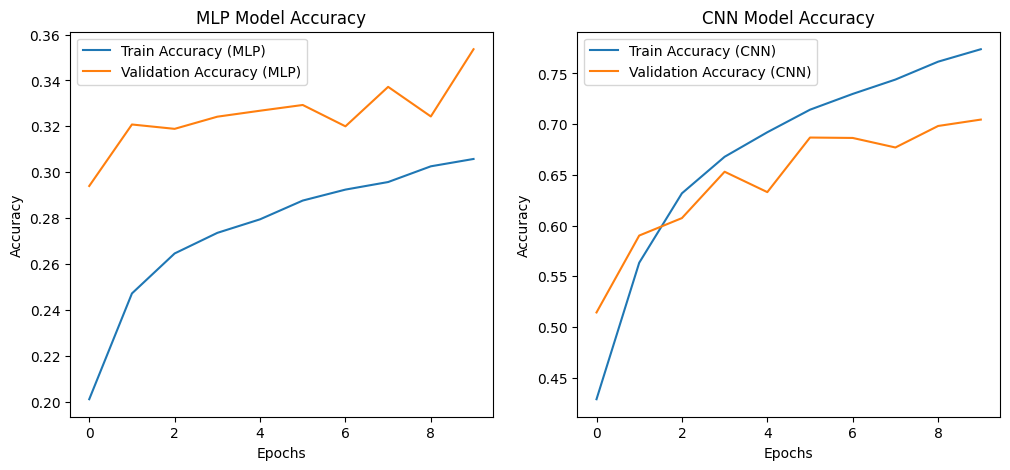

In [3]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets

import matplotlib.pyplot as plt

NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

def create_mlp_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))  # Flatten input into vector
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 output classes
    opt = optimizers.Adam(learning_rate=0.0005)
    model.compile( loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

def create_cnn_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # First Conv2D layer (32x32x32)
    x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # Second Conv2D layer (16x16x32)
    x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # Third Conv2D layer (16x16x64)
    x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # Fourth Conv2D layer (8x8x64)
    x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # Flatten (8x8x64 -> 4096)
    x = layers.Flatten()(x)

    # Fully connected layer (4096 -> 128)
    x = layers.Dense(128)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(rate=0.5)(x)

    # Output layer (10 classes for CIFAR-10)
    x = layers.Dense(NUM_CLASSES)(x)
    output_layer = layers.Activation("softmax")(x)

    # Define model
    model = models.Model(input_layer, output_layer)
    return model

# Compile and train CNN model
input_shape = (32, 32, 3)



# Create and train CNN and MLP model
print(f"MLP")
mlp_model = create_mlp_model(input_shape)
history_mlp = mlp_model.fit(x_train, y_train,
                            epochs=10,
                            batch_size=64,
                            validation_split=0.2)
print(f"CNN")
cnn_model = create_cnn_model(x_train.shape[1:])
opt = optimizers.Adam(learning_rate=0.0005)
cnn_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history_cnn = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=64,
              validation_split=0.2)

# Evaluate MLP on test data
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)

print(f"MLP Test Accuracy: {mlp_test_acc}")
print(f"CNN Test Accuracy: {cnn_test_acc}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot for MLP
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy (MLP)')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy (MLP)')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot for CNN
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy (CNN)')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
